# LSTM

In [40]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import keras


In [41]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")

In [42]:
df = pd.read_pickle(os.path.join(DATA_DIR, "all_data.pickle"))

In [43]:
df

,hearth_rate,hearth_rate_resting,hearth_corr_steps,level
0,78,59,1.000000,1
1,78,59,1.000000,1
2,78,59,1.000000,1
3,78,59,1.000000,1
4,78,59,0.982816,1
...,...,...,...,...
12523,35,35,1.000000,6
12524,35,35,1.000000,6
12525,35,35,1.000000,6
12526,35,35,1.000000,6


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hearth_rate          12528 non-null  int64  
 1   hearth_rate_resting  12528 non-null  int64  
 2   hearth_corr_steps    12528 non-null  float64
 3   level                12528 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 391.6 KB


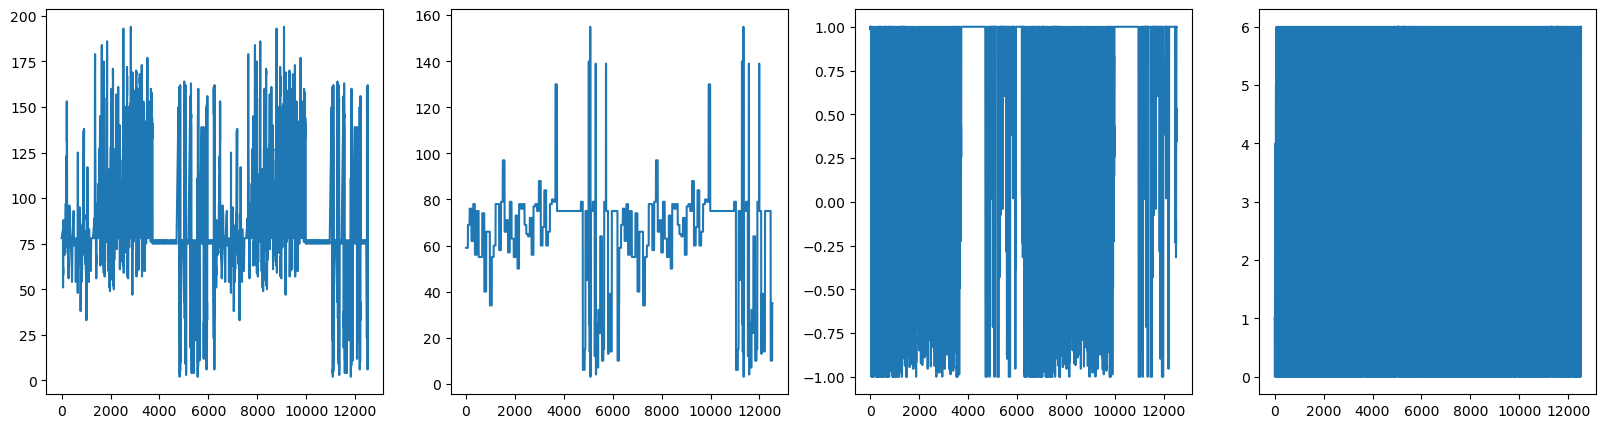

In [45]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(df.columns, start=0):
    df[col].plot(ax=ax[i])

In [46]:
df.columns

Index(['hearth_rate', 'hearth_rate_resting', 'hearth_corr_steps', 'level'], dtype='object')

In [47]:
train_X = df.loc[:10000, "hearth_rate"]
train_Y = df.loc[:10000, "level"]

test_X = df.loc[10000:, "hearth_rate"]
test_Y = df.loc[10000:, "level"]

train_X = train_X.astype('float32')
train_Y = train_Y.astype('float32')

def scaling(data):
    from sklearn.preprocessing import MinMaxScaler
    
    scaler = MinMaxScaler().fit(data) 
    scaled_features = scaler.transform(data) 
    return scaled_features
    
train_X = scaling(np.asarray(train_X).reshape(-1, 1))
test_X = scaling(np.asarray(test_X).reshape(-1, 1))

train_X

array([[0.39583334],
       [0.39583334],
       [0.39583334],
       ...,
       [0.39062503],
       [0.39062503],
       [0.3854167 ]], dtype=float32)

In [48]:
from keras.layers import LSTM
from keras.layers import Dense

inputs = keras.Input(shape=(1, 1))
x = LSTM(42, activation='relu', input_shape=(1, 1), return_sequences=True)(inputs)
x = LSTM(42, activation='relu')(x)

out_signal = Dense(1, name='out_signal')(x)

model = keras.Model(inputs=inputs, outputs=out_signal)

model.compile(
    loss={'out_signal':'mean_squared_error'},
    optimizer='adam',
    metrics={'out_signal':'acc'}
)

In [49]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 42)             7392      
                                                                 
 lstm_11 (LSTM)              (None, 42)                14280     
                                                                 
 out_signal (Dense)          (None, 1)                 43        
                                                                 
Total params: 21,715
Trainable params: 21,715
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(train_X, train_Y, epochs=70, batch_size=32, shuffle=False)
history

Epoch 1/70
313/313 [==============================] - 3s 2ms/step - loss: 8.6143 - acc: 0.1929
Epoch 2/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2366 - acc: 0.2185
Epoch 3/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2357 - acc: 0.2185
Epoch 4/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2352 - acc: 0.2185
Epoch 5/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2346 - acc: 0.2185
Epoch 6/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2342 - acc: 0.2185
Epoch 7/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2336 - acc: 0.2185
Epoch 8/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2330 - acc: 0.2185
Epoch 9/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2322 - acc: 0.2185
Epoch 10/70
313/313 [==============================] - 1s 2ms/step - loss: 4.2314 - acc: 0.2185
Epoch 11/70
313/313 [============================

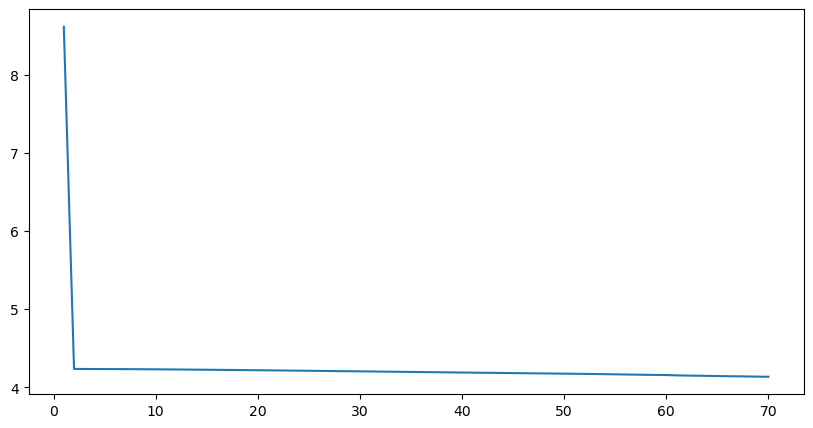

In [52]:
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer la courbe de loss
x = range(1, len(history.history['loss'])+1)
y = history.history['loss']
ax.plot(x, y)

# Afficher le graphique
plt.show()

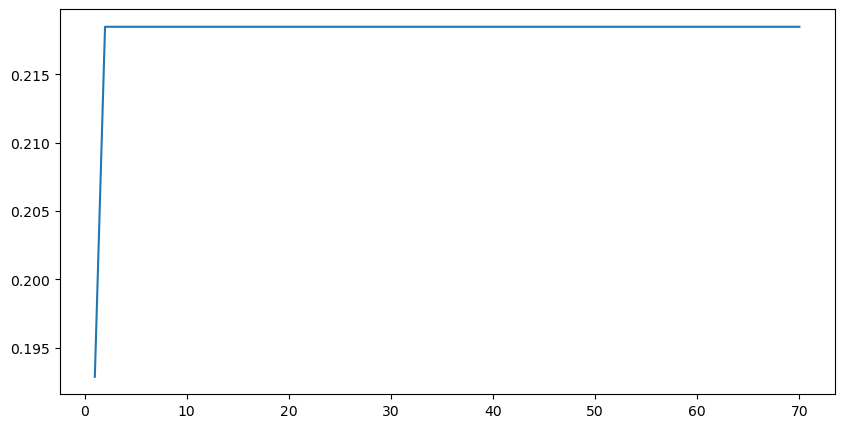

In [53]:
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer la courbe de loss
x = range(1, len(history.history['acc'])+1)
y = history.history['acc']
ax.plot(x, y)

# Afficher le graphique
plt.show()